In [1]:
import numpy
import random
import matplotlib.pyplot as plt

In [2]:
def loss_function(y, t): # L2 Loss
    return numpy.mean((y - t) ** 2) / 2

def gradient_function(y, t, x):
    return numpy.array([numpy.mean(y - t), numpy.mean((y - t) * x)])

def linear_function(a, b, x):
    return a * x + b

def gradient_descent(w, eta, x, t):
    epochs = 0
    y = linear_function(w[1], w[0], x)
    gradient = gradient_function(y, t, x)
    while numpy.linalg.norm(gradient) > 10e-5:
        y = linear_function(w[1], w[0], x)
        gradient = gradient_function(y, t, x)
        w -= eta * gradient
        epochs += 1
    return (w, epochs)

def gradient_descent_adaptive(w, eta, x, t):
    epochs = 0
    y = linear_function(w[1], w[0], x)
    gradient = gradient_function(y, t, x)
    old_loss = loss_function(y,t)
    while numpy.linalg.norm(gradient) > 10e-5:
        y = linear_function(w[1], w[0], x)
        loss = loss_function(y, t)
        gradient = gradient_function(y, t, x)
        
        if loss >= old_loss:
            eta *= 0.5
        else:
            eta *= 1.1
        
        w -= eta * gradient
        old_loss = loss
        epochs += 1
    return (w, epochs)



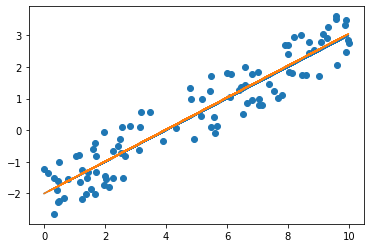

In [3]:
# generate data
amount = 100
a = .5
b = -2.
x = numpy.random.random(amount) * 10

# data points for the line
source = linear_function(a, b, x)

# data points for training with uniform noise
t = linear_function(a, b, x) + numpy.random.uniform(low=-1, high=1, size=amount)

# run gradient descent
weights = numpy.random.random(size=2) * 2. - 1.
eta = 0.01

# run gradient descent
optimized_weights,epochs = gradient_descent(numpy.copy(weights), eta, x, t)
optimized_y = linear_function(optimized_weights[1], optimized_weights[0], x)

# run gradient descent with adaptive learning rate
optimized_weights_adaptive,epochs_adaptive = gradient_descent_adaptive(numpy.copy(weights), eta, x, t)
optimized_y_adaptive = linear_function(optimized_weights_adaptive[1], optimized_weights_adaptive[0], x)

# plot data
plt.scatter(x,t)
plt.plot(x,source,'-')
plt.plot(x,optimized_y,'-')
plt.show()

In [4]:
print(f"Loss: = {loss_function(optimized_y, t): .10}")
print(f"Loss adaptive learning rate: {loss_function(optimized_y_adaptive, t): .10}") 

Loss: =  0.1637154843
Loss adaptive learning rate:  0.1637154836


In [5]:
print(f"Number of epochs: = {epochs}")
print(f"Number of epochs adaptive learning rate: {epochs_adaptive}") 

Number of epochs: = 2944
Number of epochs adaptive learning rate: 430
